<a href="https://colab.research.google.com/github/avinashkella/ETL/blob/master/GLVQ_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
#import libraries
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D as axes3d
#load dataset and distance
from sklearn.metrics import euclidean_distances
from sklearn.datasets import load_iris
import math

In [0]:
#load iris dataset and split it into two
#datapoints with labels
x = load_iris().data
y = load_iris().target
labels = load_iris().target_names

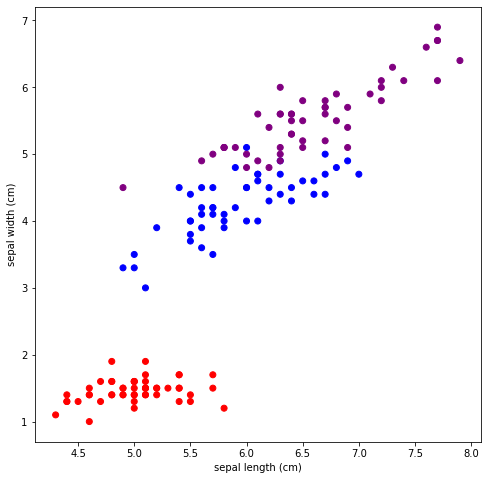

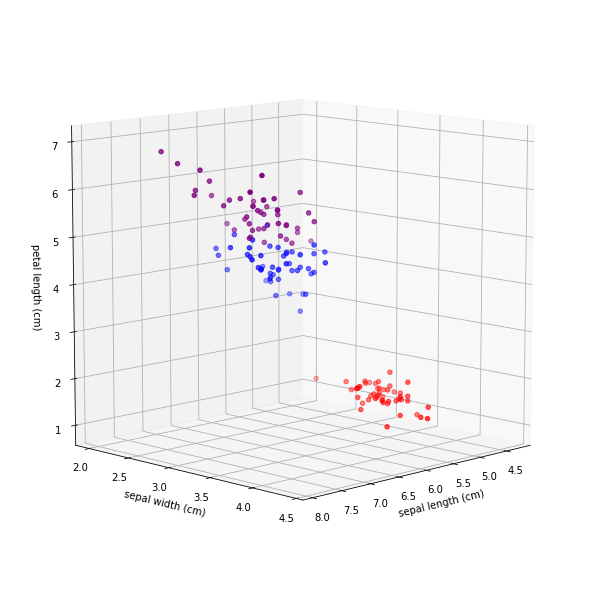

In [5]:
#for 2d
plt.figure(figsize=(8,8))
colors = ['red','blue','purple']
plt.scatter(x[:,0],x[:,2], c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel(load_iris().feature_names[0])
plt.ylabel(load_iris().feature_names[1])
plt.show()


#for 3d
fig = plt.figure(figsize=(8,8))
fig = axes3d(fig)
fig.view_init(elev = 10, azim=45)
colors = ['red','green','blue','purple']
fig.scatter(x[:,0],x[:,1],x[:,2], c=y, cmap=matplotlib.colors.ListedColormap(colors))
fig.set_xlabel(load_iris().feature_names[0])
fig.set_ylabel(load_iris().feature_names[1])
fig.set_zlabel(load_iris().feature_names[2])
plt.show()

In [0]:
def normalization(input_data):
  #define minimum and maximum for normalization of data
  minimum = np.amin(input_data, axis=0)
  maximum = np.amax(input_data, axis=0)
  #normalization formula
  normalized_data = (input_data - minimum) / (maximum - minimum)
  return normalized_data
  
normalized_data = normalization(x)

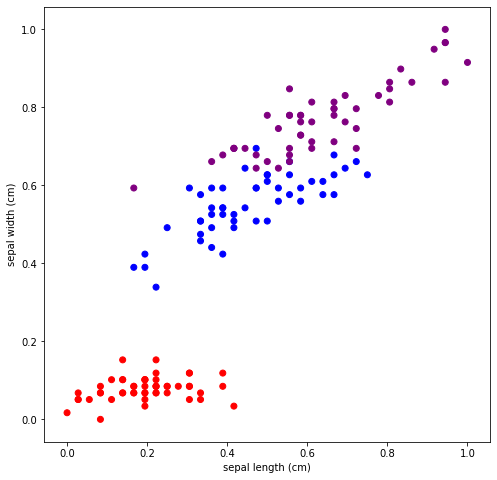

In [7]:
#plot normalized data
plt.figure(figsize=(8,8))
colors = ['red','blue','purple']
plt.scatter(normalized_data[:,0],normalized_data[:,2], c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel(load_iris().feature_names[0])
plt.ylabel(load_iris().feature_names[1])
plt.show()


In [0]:
def prt(x, y, prototypes_per_class):

  no_of_prototypes = len(list(np.unique(y))) * prototypes_per_class

  #prototypes labels
  prototypes_labels = np.unique(y)
  prototypes_labels = list(prototypes_labels) * prototypes_per_class

  prt_labels = np.expand_dims(prototypes_labels, axis = 1)
  c = np.expand_dims(np.equal(prt_labels, y), axis = 2)
  z = np.count_nonzero(c, axis = 1)

  proto = np.where(c,x,0)
  prototypes = np.sum(proto, axis = 1) / z
  return prototypes, prototypes_labels


In [0]:
#plot normalized data with prototypes
#plt.figure(figsize=(8,8))
#colors = ['red','blue','yellow']
#plt.scatter(normalized_data[:,0],normalized_data[:,2], c=y, cmap=matplotlib.colors.ListedColormap(colors))
#plt.scatter(normalized_data[:,0],normalized_data[:,2], c=y, cmap='viridis')
#plt.scatter(prototypes[:,0],prototypes[:,2], c = prototypes_labels, s=60, marker='D')
# plt.scatter(prototypes[:,0],prototypes[:,1], c = [1,1,1,1,1,1], cmap=matplotlib.colors.ListedColormap(["Black"]))
#plt.xlabel(load_iris().feature_names[0])
#plt.ylabel(load_iris().feature_names[1])
#plt.show()

In [0]:
#calculate Euclidean Distance
def euclidean_distance(data,prototype):
  #expand the dimension of x
  expand_dimension = np.expand_dims(data, axis=1)
  #print (expand_dimension)
  #difference between expand_data and prototype
  distance = expand_dimension - prototype
  #print(distance)
  #print (distance)
  #(x-w)**2
  distance_square = np.power(distance,2)
  #print (distance_square)
  #add up all distances and calculate squareroot of that
  sum_distance = np.sum(distance_square, axis=2)
  #print(np.shape(sum_distance)) 
  #sum_distances = np.sum(sum_distance, axis=1)
  dist = np.sqrt(sum_distance)
  return dist

In [0]:
#euclidean_dist = euclidean_distance(normalized_data,prototypes)

In [0]:
def best_matching_correct_prototype(data, data_labels, prototype, prototype_labels, euclidean_dist):
  edp_dimen = np.expand_dims(prototype_labels, axis = 1)
  b = np.transpose(np.equal(edp_dimen,data_labels))
  #distance of matching prototypes
  dist = np.where(b,euclidean_dist, np.inf)
  #print(dist)
  #index of minimum distance for best matching prototypes
  w_plus_index = np.argmin(dist, axis = 1)
  #print(w_plus_index)
  #get best matching prototype with respect to index
  w_plus = prototype[w_plus_index]
  #d^+ = d(x,w^+)
  d_plus = np.min(dist, axis = 1)
  return d_plus, w_plus, w_plus_index

In [0]:
#d_plus, w_plus, w_plus_index = best_matching_correct_prototype(normalized_data, y, prototypes, prototypes_labels, euclidean_dist)
#w_plus_index

In [0]:
def best_matching_incorrect_prototype(data, data_labels, prototype, prototype_labels, euclidean_dist):
  edp_dimen = np.expand_dims(prototype_labels, axis = 1)
  b = np.transpose(np.not_equal(edp_dimen,data_labels))
  dist = np.where(b,euclidean_dist, np.inf)
  #print(dist)
  #index of minimum distance for best matching prototypes
  w_minus_index = np.argmin(dist, axis = 1)
  #get best matching incorrect prototype with respect to index
  w_minus = prototype[w_minus_index]
  #d^+ = d(x,w^-)
  d_minus = np.min(dist, axis = 1)
  return d_minus, w_minus, w_minus_index

In [0]:
#d_minus, w_minus, w_minus_index = best_matching_incorrect_prototype(normalized_data, y, prototypes, prototypes_labels, euclidean_dist)
#d_minus

In [0]:
def classifier_function(d_plus,d_minus):
  classifier = (d_plus - d_minus) / (d_plus + d_minus)
  return classifier
#c_f = classifier_function(d_plus,d_minus)

In [0]:
def sigmoid(x, beta=10):
   return 1/(1+np.exp(-beta * x))

In [0]:
learning_rate = 0.1

In [0]:
#prototypes

In [0]:
def update_w_plus(data, prototype , learning_rate, w_plus, d_plus, d_minus, c_f, w_plus_index):
  sai = 2 * (d_minus / (np.square(d_plus + d_minus))) * sigmoid(c_f) * (1-sigmoid(c_f))
  #print(d_minus / (np.square(d_plus + d_minus)))
  expand_dimension = np.expand_dims(sai, axis=1)
  change_in_w = expand_dimension * (data - w_plus) * learning_rate
  #print(np.shape(change_in_w))
  
  unique_w_plus_index = np.unique(w_plus_index)
  unique_w_plus_index = np.expand_dims(unique_w_plus_index, axis = 1)

  #print(unique_w_plus_index)
  add_row_change_in_w = np.column_stack(( w_plus_index,change_in_w))
  
  check = np.equal(add_row_change_in_w[:,0], unique_w_plus_index)
  check = np.expand_dims(check, axis = 2)
  check = np.where(check, change_in_w,0)
  sum_change_in_w_plus = np.sum(check, axis = 1)
  


  return sum_change_in_w_plus, unique_w_plus_index

In [0]:
#update_w_plus(normalized_data, prototypes, learning_rate, w_plus, d_plus, d_minus, classifier_function)

In [0]:
#sum_change_in_w_plus, unique_w_plus_index = update_w_plus(normalized_data, prototypes, learning_rate, w_plus, d_plus, d_minus, c_f, w_plus_index)
#print(sum_change_in_w_plus)
#update_w_p = np.add(np.squeeze(prototypes[unique_w_plus_index]),sum_change_in_w_plus) 
#np.put_along_axis(prototypes, unique_w_plus_index, update_w_p, axis = 0)
#print(prototypes)

In [0]:
def update_w_minus(data, prototypes, learning_rate, w_minus, d_plus, d_minus, c_f, w_minus_index):
  sai = (-2) * (d_plus / (np.square(d_plus + d_minus))) * sigmoid(c_f) * (1-sigmoid(c_f))
  #print(sai)
  expand_dimension = np.expand_dims(sai, axis=1)
  change_in_w = (-expand_dimension) * (data - w_minus) * learning_rate

  unique_w_minus_index = np.unique(w_minus_index)
  unique_w_minus_index = np.expand_dims(unique_w_minus_index, axis = 1)

  #print(unique_w_minus_index)
  add_row_change_in_w = np.column_stack(( w_minus_index,change_in_w))
  
  check = np.equal(add_row_change_in_w[:,0], unique_w_minus_index)
  check = np.expand_dims(check, axis = 2)
  check = np.where(check, change_in_w,0)
  sum_change_in_w_minus = np.sum(check, axis = 1)


  return sum_change_in_w_minus, unique_w_minus_index

In [0]:
#prototypes

In [0]:
#sum_change_in_w_minus, unique_w_minus_index = update_w_plus(normalized_data, prototypes, learning_rate, w_minus, d_plus, d_minus, classifier_function)
#print(sum_change_in_w_minus)
#update_w_m = np.add(np.squeeze(prototypes[unique_w_plus_index]),sum_change_in_w_minus) 
#np.put_along_axis(prototypes, unique_w_minus_index, update_w_m, axis = 0)
#print(prototypes)

In [0]:
def plot(x, prototypes, prototypes_labels):
  plt.figure(figsize=(8,8))
  colors = ['red','blue','yellow']
  plt.scatter(x[:,0],x[:,2], c=y, cmap='viridis')
  plt.scatter(prototypes[:,0],prototypes[:,2], c = prototypes_labels, s=60, marker='D', edgecolor='k')
  # plt.scatter(prototypes[:,0],prototypes[:,1], c = [1,1,1,1,1,1], cmap=matplotlib.colors.ListedColormap(["Black"]))
  plt.xlabel(load_iris().feature_names[0])
  plt.ylabel(load_iris().feature_names[1])
  return plt.show()


In [0]:
def glvq(x , y, prototypes_per_class, runs):
  #x = normalization(x)
  #labels = load_iris().target_names
  normalized_data = normalization(x)
  #z = len(load_iris().feature_names)
  prototypes, prototypes_labels = prt(normalized_data, y, prototypes_per_class)

  error = np.array([])
  
  for i in range(runs):
    
    euclidean_dist = euclidean_distance(normalized_data,prototypes)
    
    d_plus, w_plus, w_plus_index = best_matching_correct_prototype(normalized_data, y, prototypes, prototypes_labels, euclidean_dist)
    d_minus, w_minus, w_minus_index = best_matching_incorrect_prototype(normalized_data, y, prototypes, prototypes_labels, euclidean_dist)
    
    c_f = classifier_function(d_plus,d_minus) 

    sum_change_in_w_plus, unique_w_plus_index = update_w_plus(normalized_data, prototypes, learning_rate, w_plus, d_plus, d_minus, c_f, w_plus_index)    
    update_w_p = np.add(np.squeeze(prototypes[unique_w_plus_index]),sum_change_in_w_plus) 
    np.put_along_axis(prototypes, unique_w_plus_index, update_w_p, axis = 0)
    
    
    sum_change_in_w_minus, unique_w_minus_index = update_w_plus(normalized_data, prototypes, learning_rate, w_minus, d_plus, d_minus, c_f, w_minus_index)
    update_w_m = np.add(np.squeeze(prototypes[unique_w_minus_index]),sum_change_in_w_minus) 
    np.put_along_axis(prototypes, unique_w_minus_index, update_w_m, axis = 0)
    
    err = np.sum(sigmoid(c_f), axis = 0)
    error = np.append(err, error)
  plot(normalized_data, prototypes, prototypes_labels)
  plt.figure(figsize=(8,8))
  plt.plot(np.arange(runs), error)
  return prototypes

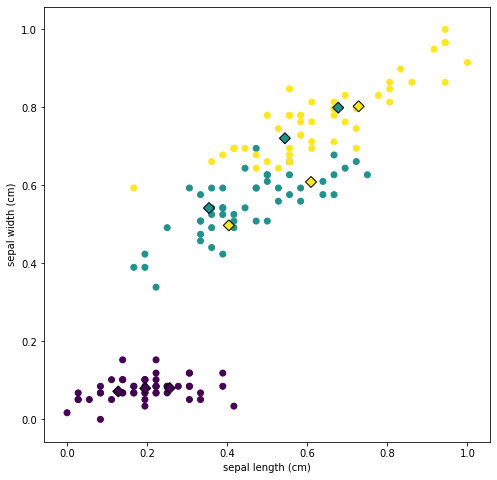

array([[0.1279104 , 0.39884881, 0.07151879, 0.07010196],
       [0.67714882, 0.48954038, 0.79924668, 0.84298154],
       [0.40397923, 0.23155911, 0.49737475, 0.44136015],
       [0.25641616, 0.70296091, 0.080117  , 0.07184217],
       [0.35434079, 0.24614969, 0.54181128, 0.44052797],
       [0.72820916, 0.46845463, 0.80280089, 0.87549695],
       [0.19522288, 0.5946827 , 0.0795836 , 0.06692501],
       [0.54406129, 0.38359955, 0.72078561, 0.59850018],
       [0.60922783, 0.34895712, 0.60876022, 0.58934533]])

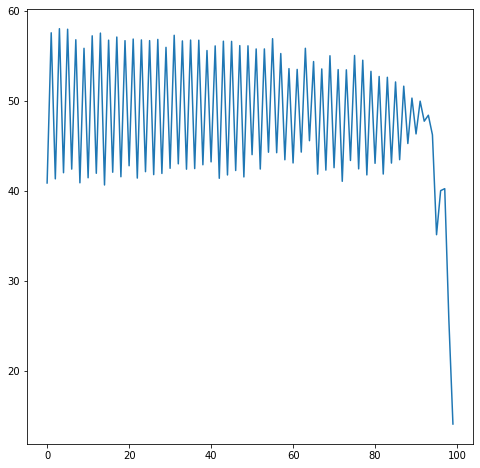

In [31]:
glvq(load_iris().data , load_iris().target, 3, 100)